<a href="https://colab.research.google.com/github/aarushisubedi01/FoodWasteSensor/blob/main/FoodWasteSensor_Sensing_Waste%2C_Serving_Sustainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🍽️ FoodWasteSensor: Sensing Waste, Serving Sustainability.
This project aims to do the Exploratory Data Analysis (EDA), Feature Engineering and Food Waste Amount Prediction, Waste Level Classification and Recommendations based on the choice of the user.


In [ ]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Regression and classification models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.metrics import ConfusionMatrixDisplay
# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Loading the Dataset
# Reading the food wastage dataset from the specified path into a pandas DataFrame
df = pd.read_csv('/content/food_wastage_data.csv')

In [ ]:
# Printing data info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [ ]:
# Displaying the first few rows
print(" First 5 rows of the dataset:")
df.head()

 First 5 rows of the dataset:


,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


In [ ]:
# Describing numerical and categorical data
print("\n Statistical Summary:")
df.describe(include='all')


 Statistical Summary:


,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
count,1782,1782.000000,1782,1782.000000,1782,1782,1782,1782,1782,1782,1782.000000
unique,5,NaN,4,NaN,2,2,3,3,3,3,NaN
top,Meat,NaN,Corporate,NaN,Room Temperature,Regular,Winter,Sit-down Dinner,Suburban,High,NaN
freq,437,NaN,515,NaN,1157,1576,632,781,821,674,NaN
mean,NaN,317.804714,NaN,411.125701,NaN,NaN,NaN,NaN,NaN,NaN,28.536476
std,NaN,67.829658,NaN,65.204674,NaN,NaN,NaN,NaN,NaN,NaN,10.461317
min,NaN,207.000000,NaN,280.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,267.000000,NaN,350.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
50%,NaN,302.000000,NaN,400.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.500000
75%,NaN,350.000000,NaN,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000


In [ ]:
# Showing total missing values in each column
missing_summary = df.isnull().sum()
print("Missing Values Summary:\n", missing_summary)

Missing Values Summary:
 Type of Food             0
Number of Guests         0
Event Type               0
Quantity of Food         0
Storage Conditions       0
Purchase History         0
Seasonality              0
Preparation Method       0
Geographical Location    0
Pricing                  0
Wastage Food Amount      0
dtype: int64


## As there are no any missing values we neednot have to handle the missing values.


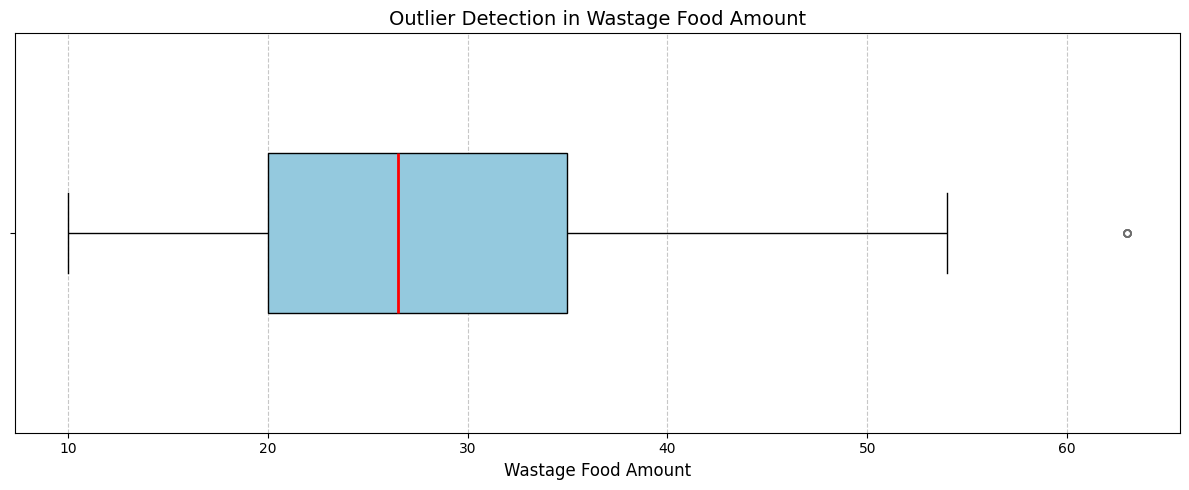

In [ ]:
# Boxplot to visualize outliers in the 'Wastage Food Amount' column

plt.figure(figsize=(12, 5))  # Setting the size of the plot for better clarity

sns.boxplot(
    x=df['Wastage Food Amount'],      # Target variable for outlier detection
    color='skyblue',
    width=0.4,
    fliersize=5,                      # Size of the outlier points (also known as "fliers")

    # Customizing the appearance of the boxplot elements
    boxprops=dict(edgecolor='black'),            # Color of the box edges
    medianprops=dict(color='red', linewidth=2),  # Highlighting the median line in red
    whiskerprops=dict(color='black'),            # Color of the whiskers
    capprops=dict(color='black')                 # Color of the caps at the ends of whiskers
)

plt.title("Outlier Detection in Wastage Food Amount", fontsize=14)  # Title of the plot
plt.xlabel("Wastage Food Amount", fontsize=12)                      # Label for the x-axis
plt.grid(True, axis='x', linestyle='--', alpha=0.7)                 # Adding light gridlines along the x-axis
plt.tight_layout()                                                  # Optimizing spacing in the plot layout
plt.show()                                                          # Displaying the final plot


## Data Cleaning (Standardization + Label Encoding)

In [ ]:
# Standardizing column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Labeling encode categorical variables
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns


In [ ]:
# Dictionary to store label mappings for each categorical column
label_mappings = {}

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip()  # Clean whitespace
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Printing all label mappings
print("Label Encodings for Categorical Columns:\n")
for col, mapping in label_mappings.items():
    print(f"{col}:", mapping)

Label Encodings for Categorical Columns:

Type_of_Food: {'Baked Goods': np.int64(0), 'Dairy Products': np.int64(1), 'Fruits': np.int64(2), 'Meat': np.int64(3), 'Vegetables': np.int64(4)}
Event_Type: {'Birthday': np.int64(0), 'Corporate': np.int64(1), 'Social Gathering': np.int64(2), 'Wedding': np.int64(3)}
Storage_Conditions: {'Refrigerated': np.int64(0), 'Room Temperature': np.int64(1)}
Purchase_History: {'Occasional': np.int64(0), 'Regular': np.int64(1)}
Seasonality: {'All Seasons': np.int64(0), 'Summer': np.int64(1), 'Winter': np.int64(2)}
Preparation_Method: {'Buffet': np.int64(0), 'Finger Food': np.int64(1), 'Sit-down Dinner': np.int64(2)}
Geographical_Location: {'Rural': np.int64(0), 'Suburban': np.int64(1), 'Urban': np.int64(2)}
Pricing: {'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}


In [ ]:
# Printing first few rows after label mapping
df.head()

,Type_of_Food,Number_of_Guests,Event_Type,Quantity_of_Food,Storage_Conditions,Purchase_History,Seasonality,Preparation_Method,Geographical_Location,Pricing,Wastage_Food_Amount
0,3,310,1,450,0,1,0,0,2,1,25
1,3,400,0,500,1,1,2,0,1,0,40
2,4,302,0,371,0,1,1,0,1,1,27
3,3,491,0,497,0,1,0,1,0,0,32
4,3,300,1,400,0,1,2,1,2,2,25


In [ ]:
# Displaying summary statistics and distribution characteristics of the target variable

print("Descriptive Statistics for Wastage Food Amount:")
print(df['Wastage_Food_Amount'].describe())

# Checking for skewness to understand the distribution symmetry of the target variable
print("\nSkewness:", df['Wastage_Food_Amount'].skew())  # A skew > 0 indicates right skew; < 0 indicates left skew


Descriptive Statistics for Wastage Food Amount:
count    1782.000000
mean       28.536476
std        10.461317
min        10.000000
25%        20.000000
50%        26.500000
75%        35.000000
max        63.000000
Name: Wastage_Food_Amount, dtype: float64

Skewness: 0.5160954348913582


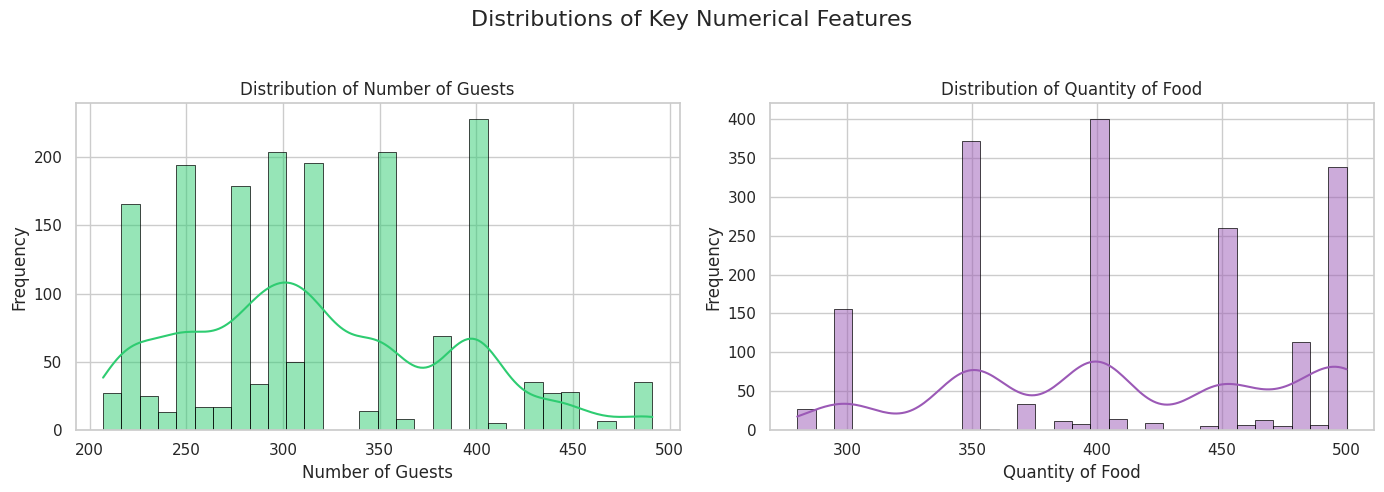

In [ ]:
# Set the visual style/theme for seaborn plots
sns.set(style="whitegrid")
# Creating side-by-side subplots to visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Histogram for Number of Guests ---
sns.histplot(
    df['Number_of_Guests'],
    bins=30,
    kde=True,
    color='#2ECC71',
    edgecolor='black',
    linewidth=0.5,
    ax=axes[0]
)
axes[0].set_title("Distribution of Number of Guests")  # Title for the first plot
axes[0].set_xlabel("Number of Guests")
axes[0].set_ylabel("Frequency")

# --- Histogram for Quantity of Food ---
sns.histplot(
    df['Quantity_of_Food'],
    bins=30,
    kde=True,
    color='#9B59B6',
    edgecolor='black',
    linewidth=0.5,
    ax=axes[1]
)
axes[1].set_title("Distribution of Quantity of Food")  # Title for the second plot
axes[1].set_xlabel("Quantity of Food")
axes[1].set_ylabel("Frequency")

# Overall title and layout adjustment
plt.suptitle("Distributions of Key Numerical Features", fontsize=16)  # Overall figure title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



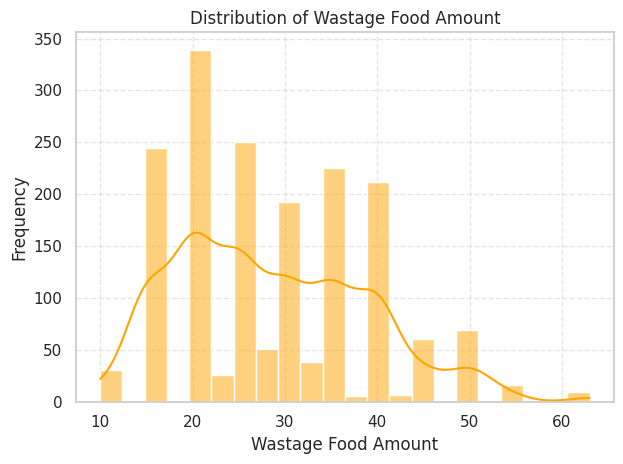

In [ ]:
# Histogram with KDE for the target variable 'Wastage_Food_Amount'

sns.histplot(
    df['Wastage_Food_Amount'],
    kde=True,
    color='orange'
)

plt.title("Distribution of Wastage Food Amount")
plt.xlabel("Wastage Food Amount")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

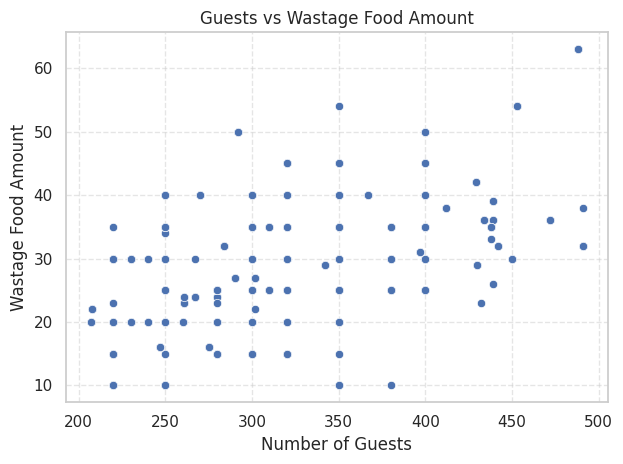

In [ ]:
# Scatter plot to visualize the relationship between Number of Guests and Wastage Food Amount

sns.scatterplot(
    x='Number_of_Guests',
    y='Wastage_Food_Amount',
    data=df
)

plt.title("Guests vs Wastage Food Amount")
plt.xlabel("Number of Guests")
plt.ylabel("Wastage Food Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

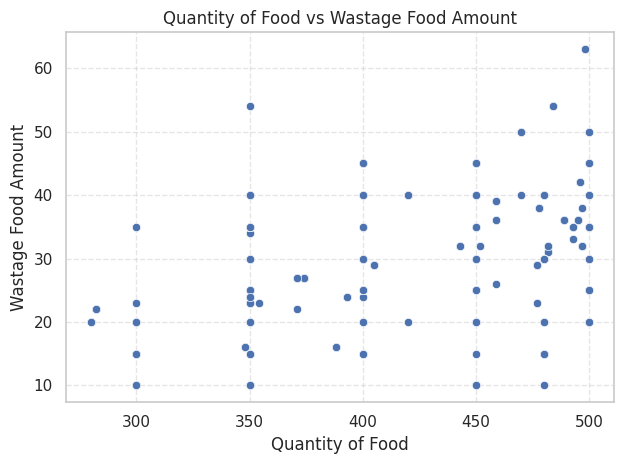

In [ ]:
# Scatter plot to explore the relationship between Quantity of Food and Wastage Food Amount

sns.scatterplot(
    x='Quantity_of_Food',
    y='Wastage_Food_Amount',
    data=df
)

plt.title("Quantity of Food vs Wastage Food Amount")
plt.xlabel("Quantity of Food")
plt.ylabel("Wastage Food Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


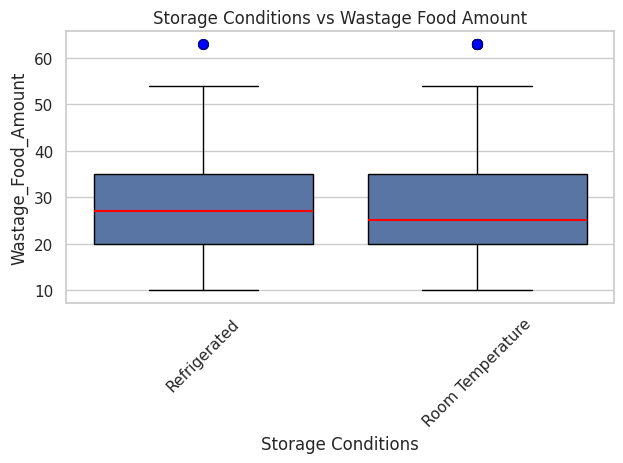

In [ ]:
# Reversing label encoding for 'Storage_Conditions' to get original category names for plotting

# Creating a mapping from encoded labels back to original category names
storage_map = {v: k for k, v in label_mappings['Storage_Conditions'].items()}

# Making a copy of the dataframe to avoid modifying the original data
df_plot = df.copy()

# Replacing encoded values with original category names using the reversed mapping
df_plot['Storage_Conditions'] = df_plot['Storage_Conditions'].map(storage_map)

# Plotting a boxplot to visualize the distribution of Wastage Food Amount across storage conditions
sns.boxplot(
    x='Storage_Conditions',         # Categorical feature with original names
    y='Wastage_Food_Amount',        # Target variable to compare
    data=df_plot,                   # Using the modified dataframe for plotting
    boxprops=dict(linewidth=1, edgecolor='black'),
    medianprops=dict(color='red', linewidth=1.5),
    whiskerprops=dict(color='black', linewidth=1),
    capprops=dict(color='black', linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='blue', markersize=7, linestyle='none', markeredgecolor='darkblue')
)

plt.title("Storage Conditions vs Wastage Food Amount")
plt.xlabel("Storage Conditions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


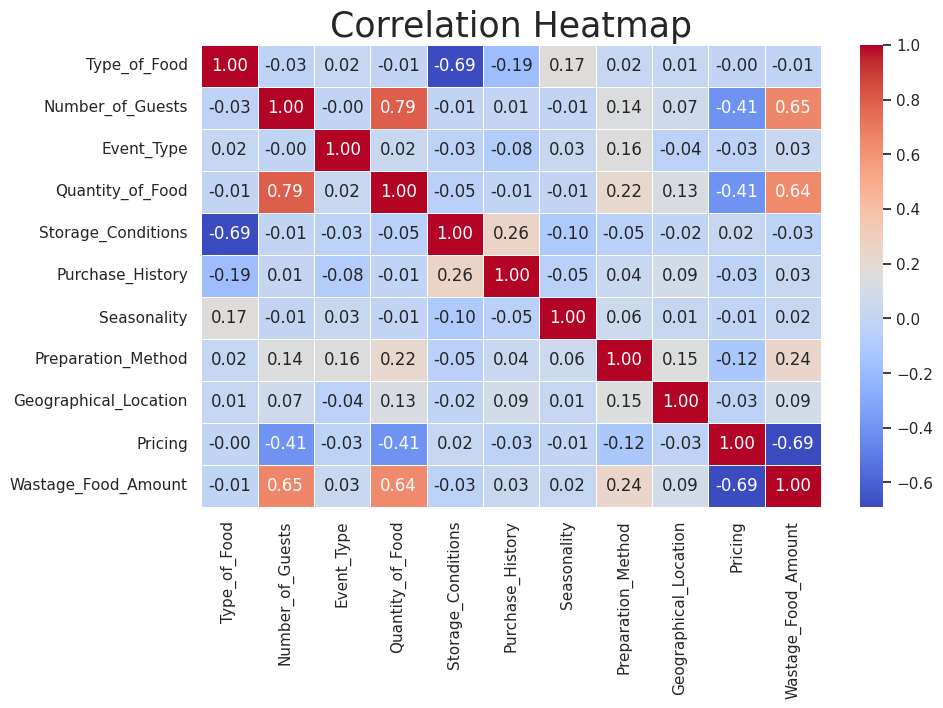

In [ ]:
# Plotting a correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(10, 6))

# Computing and plot the correlation matrix with annotations and a diverging colormap
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize = 25)
plt.show()

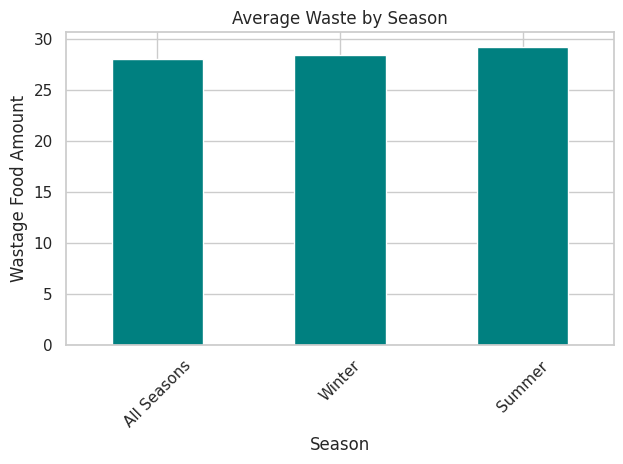

Seasonality and Average Waste:
 Seasonality
All Seasons    28.054575
Winter         28.460443
Summer         29.197343
Name: Wastage_Food_Amount, dtype: float64


In [ ]:
# Reversing the label encoding for 'Seasonality' to get original category names
season_map = {v: k for k, v in label_mappings['Seasonality'].items()}

# Grouping data by encoded 'Seasonality' and calculating mean Wastage Food Amount for each group
season_avg = df.groupby('Seasonality')['Wastage_Food_Amount'].mean()

# Mapping the encoded season labels back to their original names for better readability
season_avg.index = season_avg.index.map(season_map)

# Sorting the averages for a more intuitive bar plot
season_avg = season_avg.sort_values()

# Plotting the average waste by season as a bar chart
season_avg.plot(kind='bar', color='teal')
plt.title("Average Waste by Season")
plt.ylabel("Wastage Food Amount")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Printing season-wise average waste with readable names
print("Seasonality and Average Waste:\n", season_avg)


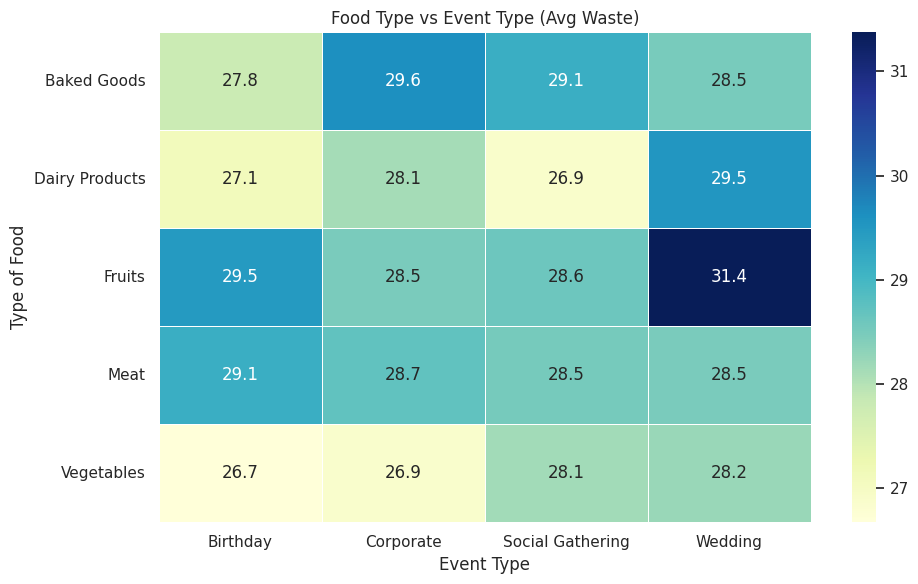

In [ ]:
# Reversing label encoding for 'Type_of_Food' and 'Event_Type' to get original category names
food_map = {v: k for k, v in label_mappings['Type_of_Food'].items()}
event_map = {v: k for k, v in label_mappings['Event_Type'].items()}

# Creating a pivot table with mean Wastage Food Amount for combinations of Food Type and Event Type (encoded values)
pivot = df.pivot_table(
    values='Wastage_Food_Amount',
    index='Type_of_Food',
    columns='Event_Type',
    aggfunc='mean'
)

# Mapping encoded indices and columns back to original names for readability
pivot.index = pivot.index.map(food_map)
pivot.columns = pivot.columns.map(event_map)

# Plotting heatmap with readable labels
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Food Type vs Event Type (Avg Waste)")
plt.xlabel("Event Type")
plt.ylabel("Type of Food")
plt.tight_layout()
plt.show()


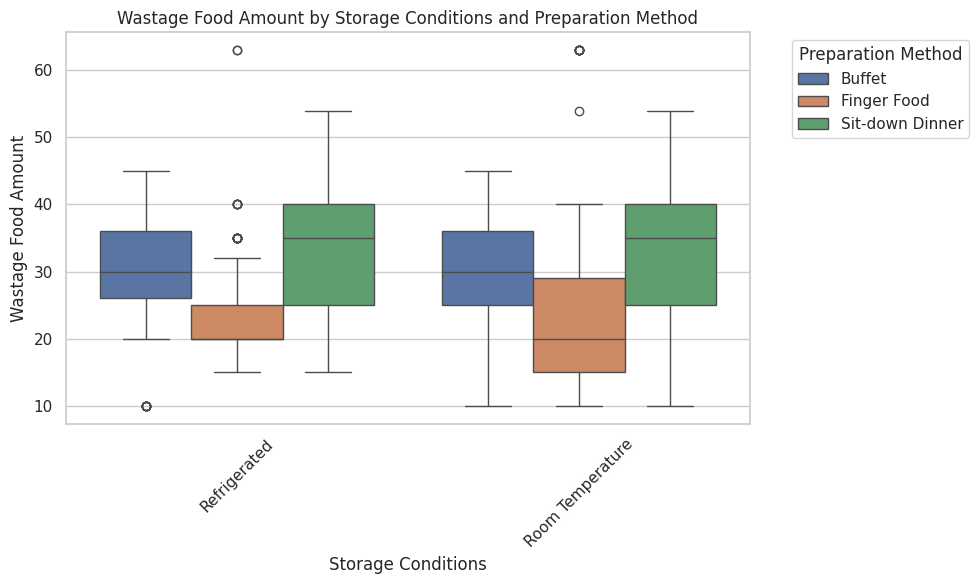

In [ ]:
# Reversing label encodings for 'Storage_Conditions' and 'Preparation_Method' to get original category names
storage_map = {v: k for k, v in label_mappings['Storage_Conditions'].items()}
prep_map = {v: k for k, v in label_mappings['Preparation_Method'].items()}

# Creating a copy of the dataframe to avoid modifying original data
df_plot = df.copy()

# Mapping encoded values back to original labels for both features
df_plot['Storage_Conditions'] = df_plot['Storage_Conditions'].map(storage_map)
df_plot['Preparation_Method'] = df_plot['Preparation_Method'].map(prep_map)

# Plotting boxplot showing distribution of Wastage Food Amount by Storage Conditions,
# with Preparation Method as hue to compare groups within each storage condition
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Storage_Conditions',
    y='Wastage_Food_Amount',
    hue='Preparation_Method',
    data=df_plot
)

plt.title("Wastage Food Amount by Storage Conditions and Preparation Method")
plt.xlabel("Storage Conditions")
plt.ylabel("Wastage Food Amount")
plt.xticks(rotation=45)

# Placing legend outside the plot area to the right
plt.legend(title="Preparation Method", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate wastage per guest ratio
df['Wastage_per_Guest'] = df['Wastage_Food_Amount'] / df['Number_of_Guests']

# Setting a threshold, e.g., top 5% wastage per guest as anomalies
threshold = df['Wastage_per_Guest'].quantile(0.95)

anomalies_ratio = df[df['Wastage_per_Guest'] > threshold]

print(f"Rows with high wastage per guest (above 95th percentile = {threshold:.5f}):")
print(anomalies_ratio[['Number_of_Guests', 'Wastage_Food_Amount', 'Wastage_per_Guest']])


Rows with high wastage per guest (above 95th percentile = 0.13333):
      Number_of_Guests  Wastage_Food_Amount  Wastage_per_Guest
8                  320                   45           0.140625
20                 220                   30           0.136364
63                 250                   40           0.160000
70                 250                   35           0.140000
123                250                   40           0.160000
...                ...                  ...                ...
1666               250                   40           0.160000
1704               292                   50           0.171233
1725               270                   40           0.148148
1754               320                   45           0.140625
1759               292                   50           0.171233

[70 rows x 3 columns]


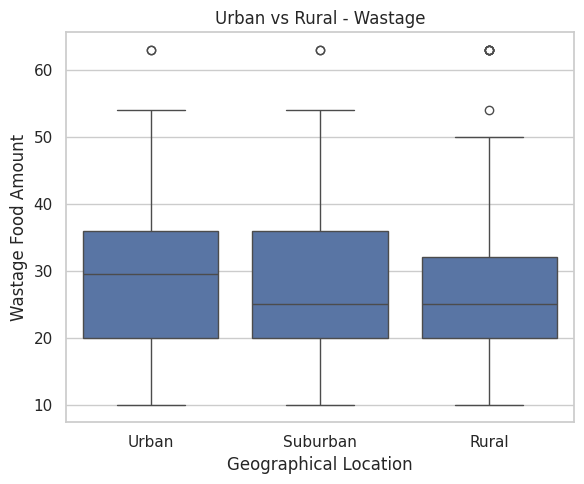

In [ ]:
# Reversing te label encoding for Geographical_Location
geo_map = {v: k for k, v in label_mappings['Geographical_Location'].items()}

# Creating a temporary DataFrame for plotting
df_plot = df.copy()
df_plot['Geographical_Location'] = df_plot['Geographical_Location'].map(geo_map)

# Plotting boxplot with original category labels
plt.figure(figsize=(6, 5))
sns.boxplot(x='Geographical_Location', y='Wastage_Food_Amount', data=df_plot)
plt.title("Urban vs Rural - Wastage")
plt.xlabel("Geographical Location")
plt.ylabel("Wastage Food Amount")
plt.tight_layout()
plt.show()


In [ ]:
# Categorizing wastage levels into Low, Medium, and High based on food amount
df['Waste_Level'] = pd.cut(df['Wastage_Food_Amount'],
                           bins=[-1, 20, 35, df['Wastage_Food_Amount'].max()],
                           labels=['Low', 'Medium', 'High'])

# Creating new feature: Guest-to-Food Ratio
# This helps understand how efficiently food was planned per guest
# +1 is added to avoid division by zero in case 'Number_of_Guests' is 0
df['Guest_Food_Ratio'] = df['Quantity_of_Food'] / (df['Number_of_Guests'] + 1)

# Displaying a sample of the new engineered features
print(" Sample of Engineered Features:")
print(df[['Wastage_Food_Amount', 'Waste_Level', 'Guest_Food_Ratio']].head())

# Showing the distribution of each new category
print("\nWaste Level Distribution:")
print(df['Waste_Level'].value_counts())


 Sample of Engineered Features:
   Wastage_Food_Amount Waste_Level  Guest_Food_Ratio
0                   25      Medium          1.446945
1                   40        High          1.246883
2                   27      Medium          1.224422
3                   32      Medium          1.010163
4                   25      Medium          1.328904

Waste Level Distribution:
Waste_Level
Medium    773
Low       594
High      415
Name: count, dtype: int64


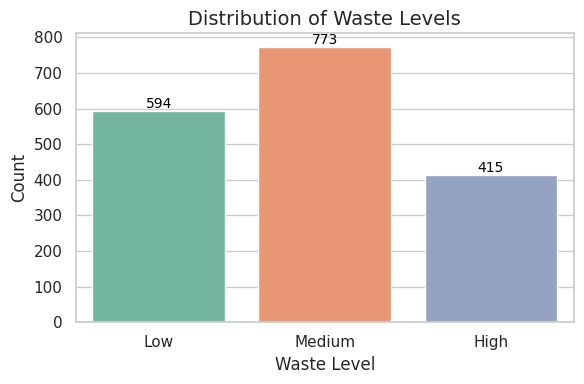

In [ ]:
# Setting seaborn style
sns.set(style="whitegrid")

# Plotting Waste Level Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Waste_Level', hue='Waste_Level', palette='Set2', legend=False)

# ing title and labels
plt.title("Distribution of Waste Levels", fontsize=14)
plt.xlabel("Waste Level")
plt.ylabel("Count")

# Showing value labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black',
                       xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

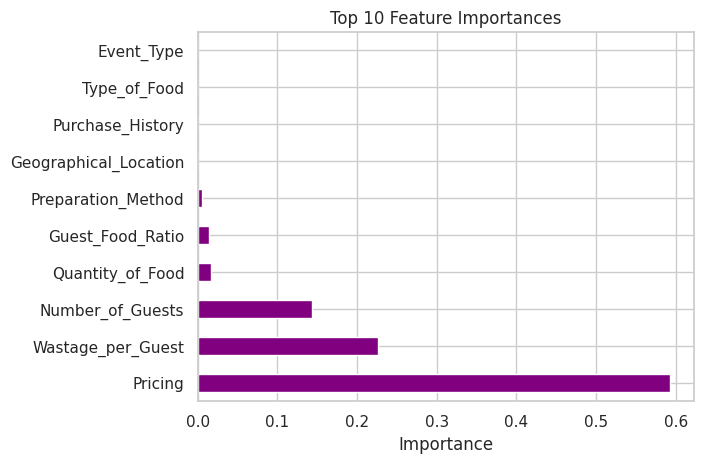

Top Features:
 Pricing                  0.592783
Wastage_per_Guest        0.226147
Number_of_Guests         0.143892
Quantity_of_Food         0.016667
Guest_Food_Ratio         0.014587
Preparation_Method       0.005851
Geographical_Location    0.000041
Purchase_History         0.000010
Type_of_Food             0.000010
Event_Type               0.000009
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Preparing input/output
X = df.drop(['Wastage_Food_Amount', 'Waste_Level'], axis=1)
y = df['Wastage_Food_Amount']

# Training model
model = RandomForestRegressor()
model.fit(X, y)

# Plot feature importances
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', color='purple')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

print("Top Features:\n", feat_imp.nlargest(10))


## Linear Regression

In [ ]:
# Preparing features (X) and target (y)
X = df.drop(['Wastage_Food_Amount', 'Waste_Level'], axis=1)
y = df['Wastage_Food_Amount']

# Splitting into train and test sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression

# Initializing and training Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting wastage on test set
lr_preds = lr_model.predict(X_test)

## Linear Regression Evaluation

In [ ]:
# Dictionaries to decode encoded categorical features for interpretation
decoding_maps = {
    'Type_of_Food': {
        0: 'Baked Goods', 1: 'Dairy Products', 2: 'Fruits', 3: 'Meat', 4: 'Vegetables'
    },
    'Event_Type': {
        0: 'Birthday', 1: 'Corporate', 2: 'Social Gathering', 3: 'Wedding'
    },
    'Storage_Conditions': {
        0: 'Refrigerated', 1: 'Room Temperature'
    },
    'Purchase_History': {
        0: 'Occasional', 1: 'Regular'
    },
    'Seasonality': {
        0: 'All Seasons', 1: 'Summer', 2: 'Winter'
    },
    'Preparation_Method': {
        0: 'Buffet', 1: 'Finger Food', 2: 'Sit-down Dinner'
    },
    'Geographical_Location': {
        0: 'Rural', 1: 'Suburban', 2: 'Urban'
    },
    'Pricing': {
        0: 'High', 1: 'Low', 2: 'Moderate'
    }
}

# Selecting sample of 5 test rows for demonstration
sample_X = X_test.iloc[:5].copy()
sample_y = y_test.iloc[:5].copy()
sample_preds = lr_preds[:5]

# Decoding categorical feature values in sample for human readabilityfor col, mapping in decoding_maps.items():
for col, mapping in decoding_maps.items():
    if col in sample_X.columns:
        sample_X[col] = sample_X[col].map(mapping)

# Combining decoded features with actual and predicted wastage and error difference
sample_df = sample_X.copy()
sample_df['Actual Wastage (kg)'] = sample_y.values
sample_df['Predicted Wastage (kg)'] = sample_preds.round(2)
sample_df['Difference (kg)'] = (sample_y.values - sample_preds).round(2)

# Resetting index
sample_df = sample_df.reset_index(drop=True)

# Display
print("Linear Regression - Sample Predictions with Decoded Features (Top 5)")
sample_df

Linear Regression - Sample Predictions with Decoded Features (Top 5)


,Type_of_Food,Number_of_Guests,Event_Type,Quantity_of_Food,Storage_Conditions,Purchase_History,Seasonality,Preparation_Method,Geographical_Location,Pricing,Wastage_per_Guest,Guest_Food_Ratio,Actual Wastage (kg),Predicted Wastage (kg),Difference (kg)
0,Meat,350,Corporate,450,Refrigerated,Regular,Winter,Finger Food,Suburban,Moderate,0.057143,1.282051,20,21.35,-1.35
1,Baked Goods,397,Social Gathering,482,Room Temperature,Regular,Winter,Sit-down Dinner,Suburban,Moderate,0.078086,1.211055,31,32.01,-1.01
2,Dairy Products,280,Social Gathering,350,Room Temperature,Regular,All Seasons,Finger Food,Suburban,Moderate,0.071429,1.245552,20,19.78,0.22
3,Dairy Products,261,Birthday,350,Room Temperature,Regular,All Seasons,Sit-down Dinner,Suburban,Moderate,0.088123,1.335878,23,23.13,-0.13
4,Fruits,230,Corporate,500,Room Temperature,Regular,All Seasons,Sit-down Dinner,Suburban,Low,0.086957,2.164502,20,18.10,1.90


In [ ]:
# Evaluating and printing model performance metrics
print("Linear Regression Evaluation")
print(f"MAE: {mean_absolute_error(y_test, lr_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, lr_preds):.2f}")
print(f"R² Score: {r2_score(y_test, lr_preds):.2f}")


Linear Regression Evaluation
MAE: 1.02
MSE: 1.98
R² Score: 0.98


## Random Forest Regressor

In [ ]:
# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Training the model on training data
rf_model.fit(X_train, y_train)

# Making predictions on the test set
rf_preds = rf_model.predict(X_test)

In [ ]:
# Extracting top 5 samples (a copy so we don't modify X_test)
sample_X = X_test.iloc[:5].copy()

# Decoding categorical columns only in this sample DataFrame
for col, mapping in decoding_maps.items():
    if col in sample_X.columns:
        sample_X[col] = sample_X[col].map(mapping)

# Creating prediction table with decoded features
rf_comparison_df = sample_X.copy()
rf_comparison_df['Actual Wastage (kg)'] = y_test.iloc[:5].values
rf_comparison_df['Predicted Wastage (kg)'] = rf_preds[:5].round(2)
rf_comparison_df['Difference (kg)'] = (y_test.iloc[:5].values - rf_preds[:5]).round(2)

rf_comparison_df = rf_comparison_df.reset_index(drop=True)
rf_comparison_df

,Type_of_Food,Number_of_Guests,Event_Type,Quantity_of_Food,Storage_Conditions,Purchase_History,Seasonality,Preparation_Method,Geographical_Location,Pricing,Wastage_per_Guest,Guest_Food_Ratio,Actual Wastage (kg),Predicted Wastage (kg),Difference (kg)
0,Meat,350,Corporate,450,Refrigerated,Regular,Winter,Finger Food,Suburban,Moderate,0.057143,1.282051,20,20.03,-0.03
1,Baked Goods,397,Social Gathering,482,Room Temperature,Regular,Winter,Sit-down Dinner,Suburban,Moderate,0.078086,1.211055,31,31.01,-0.01
2,Dairy Products,280,Social Gathering,350,Room Temperature,Regular,All Seasons,Finger Food,Suburban,Moderate,0.071429,1.245552,20,20.00,0.00
3,Dairy Products,261,Birthday,350,Room Temperature,Regular,All Seasons,Sit-down Dinner,Suburban,Moderate,0.088123,1.335878,23,23.00,0.00
4,Fruits,230,Corporate,500,Room Temperature,Regular,All Seasons,Sit-down Dinner,Suburban,Low,0.086957,2.164502,20,20.00,0.00


## Random Forest Regressor Evaluation


In [ ]:
# Evaluating and printing model performance metrics
print("Random Forest Evaluation")
print(f"MAE: {mean_absolute_error(y_test, rf_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, rf_preds):.2f}")
print(f"R² Score: {r2_score(y_test, rf_preds):.2f}")

Random Forest Evaluation
MAE: 0.04
MSE: 0.10
R² Score: 1.00


## XGBoost Regressor

In [ ]:
# Initializing and training the XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting with the trained XGBoost model
xgb_preds = xgb_model.predict(X_test)

# Taking the first 5 samples from X_test (copy to avoid modifying original data)
sample_X = X_test.iloc[:5].copy()

# Decoding categorical columns only in this sample DataFrame
for col, mapping in decoding_maps.items():
    if col in sample_X.columns:
        sample_X[col] = sample_X[col].map(mapping)

# Creating the prediction comparison table with decoded features
xgb_comparison_df = sample_X.copy()
xgb_comparison_df['Actual Wastage (kg)'] = y_test.iloc[:5].values
xgb_comparison_df['Predicted Wastage (kg)'] = xgb_preds[:5].round(2)
xgb_comparison_df['Difference (kg)'] = (y_test.iloc[:5].values - xgb_preds[:5]).round(2)

xgb_comparison_df = xgb_comparison_df.reset_index(drop=True)
xgb_comparison_df


,Type_of_Food,Number_of_Guests,Event_Type,Quantity_of_Food,Storage_Conditions,Purchase_History,Seasonality,Preparation_Method,Geographical_Location,Pricing,Wastage_per_Guest,Guest_Food_Ratio,Actual Wastage (kg),Predicted Wastage (kg),Difference (kg)
0,Meat,350,Corporate,450,Refrigerated,Regular,Winter,Finger Food,Suburban,Moderate,0.057143,1.282051,20,20.0,0.0
1,Baked Goods,397,Social Gathering,482,Room Temperature,Regular,Winter,Sit-down Dinner,Suburban,Moderate,0.078086,1.211055,31,31.0,0.0
2,Dairy Products,280,Social Gathering,350,Room Temperature,Regular,All Seasons,Finger Food,Suburban,Moderate,0.071429,1.245552,20,20.0,0.0
3,Dairy Products,261,Birthday,350,Room Temperature,Regular,All Seasons,Sit-down Dinner,Suburban,Moderate,0.088123,1.335878,23,23.0,0.0
4,Fruits,230,Corporate,500,Room Temperature,Regular,All Seasons,Sit-down Dinner,Suburban,Low,0.086957,2.164502,20,20.0,-0.0


## XGBoost Evaluation

In [ ]:
print(" XGBoost Evaluation")
print(f"MAE: {mean_absolute_error(y_test, xgb_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, xgb_preds):.2f}")
print(f"R² Score: {r2_score(y_test, xgb_preds):.2f}")

 XGBoost Evaluation
MAE: 0.01
MSE: 0.01
R² Score: 1.00


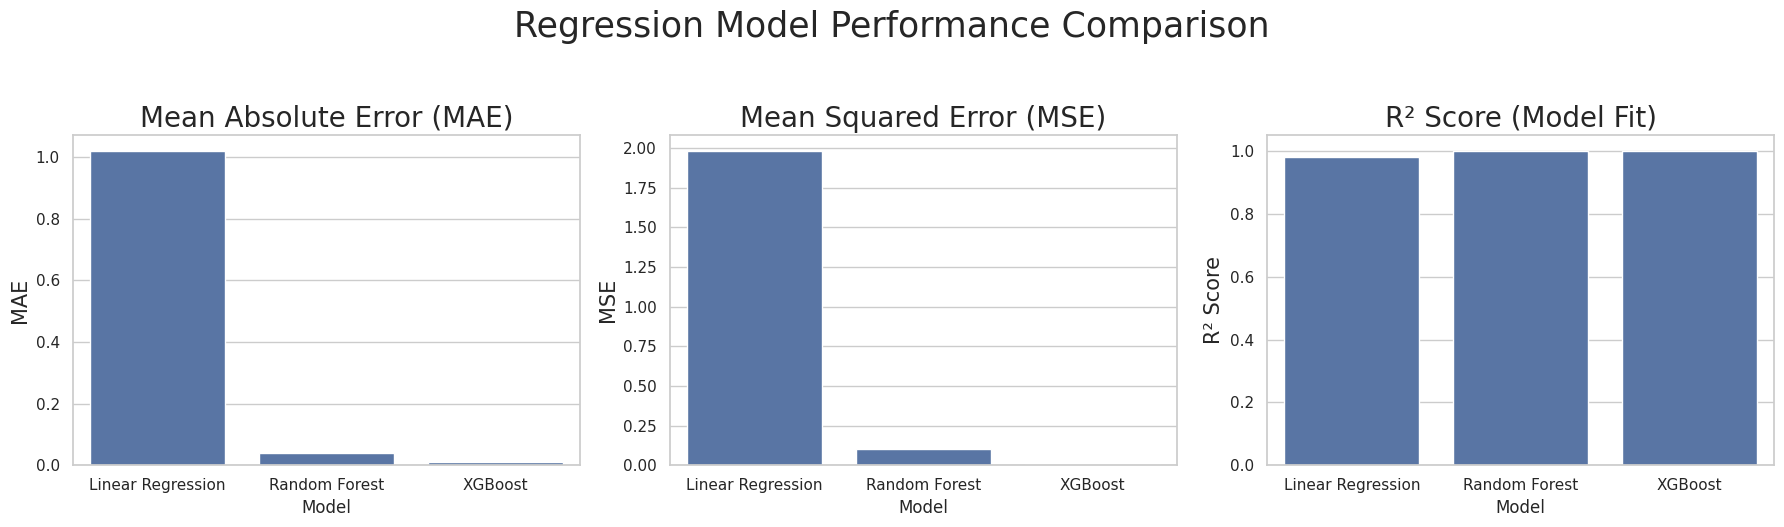

In [ ]:
# Setting the plotting style
sns.set(style="whitegrid")

# Creating a DataFrame for metrics
eval_comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test, lr_preds),
            mean_absolute_error(y_test, rf_preds),
            mean_absolute_error(y_test, xgb_preds)],
    'MSE': [mean_squared_error(y_test, lr_preds),
            mean_squared_error(y_test, rf_preds),
            mean_squared_error(y_test, xgb_preds)],
    'R² Score': [r2_score(y_test, lr_preds),
                 r2_score(y_test, rf_preds),
                 r2_score(y_test, xgb_preds)]
})

# Rounding for cleaner visuals
eval_comparison_df[['MAE', 'MSE', 'R² Score']] = eval_comparison_df[['MAE', 'MSE', 'R² Score']].round(2)

# Initializing the figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting MAE
sns.barplot(x='Model', y='MAE', data=eval_comparison_df, ax=axes[0])
axes[0].set_title("Mean Absolute Error (MAE)", fontsize= 20)
axes[0].set_ylabel("MAE", fontsize= 15)

# Plotting MSE
sns.barplot(x='Model', y='MSE', data=eval_comparison_df, ax=axes[1])
axes[1].set_title("Mean Squared Error (MSE)", fontsize= 20)
axes[1].set_ylabel("MSE", fontsize= 15)

# Plotting R² Score
sns.barplot(x='Model', y='R² Score', data=eval_comparison_df, ax=axes[2])
axes[2].set_title("R² Score (Model Fit)", fontsize= 20)
axes[2].set_ylabel("R² Score", fontsize= 15)
axes[2].set_ylim(0, 1.05)  # R² ranges roughly between 0 and 1

# Improving layout and adding a main title
plt.suptitle("Regression Model Performance Comparison", fontsize= 25, y=1.05)
plt.tight_layout()
plt.show()


## **Classification**

# Data Preparation

In [ ]:
# Initializing LabelEncoder
le = LabelEncoder()

# Selecting columns with object dtype (categorical features)
cat_cols = df.select_dtypes(include='object').columns

# Encoding each categorical column
for col in cat_cols:
    # Clean strings by stripping leading/trailing spaces
    df[col] = df[col].astype(str).str.strip()
    # Apply label encoding
    df[col] = le.fit_transform(df[col])

# Encoding the 'Waste_Level' column separately to keep mapping for decoding later
le_cls = LabelEncoder()
df['Waste_Level_Encoded'] = le_cls.fit_transform(df['Waste_Level'])

In [ ]:
# Preparing feature matrix X and target vector y for classification
X_cls = df.drop(['Wastage_Food_Amount', 'Waste_Level', 'Waste_Level_Encoded'], axis=1)
y_cls = df['Waste_Level_Encoded']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)  # stratify to maintain class distribution

# Decision Tree - Training & Predictions

In [ ]:
# Initializing the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model on the training set
dt_model.fit(X_train_cls, y_train_cls)

# Predicting the waste level classes on the test set
dt_preds = dt_model.predict(X_test_cls)

## **Decision Tree - Evaluation**

In [ ]:
# Printing overall accuracy of the Decision Tree model on the test set
print("Decision Tree Evaluation")
print(f"Accuracy: {accuracy_score(y_test_cls, dt_preds):.2f}")

# Decoding labels back to original string labels before classification report
y_test_labels = le_cls.inverse_transform(y_test_cls)
dt_preds_labels = le_cls.inverse_transform(dt_preds)

# Printing detailed classification report showing precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test_labels, dt_preds_labels))

Decision Tree Evaluation
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99        83
         Low       1.00      1.00      1.00       119
      Medium       0.99      0.99      0.99       155

    accuracy                           0.99       357
   macro avg       0.99      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357



<Figure size 600x400 with 0 Axes>

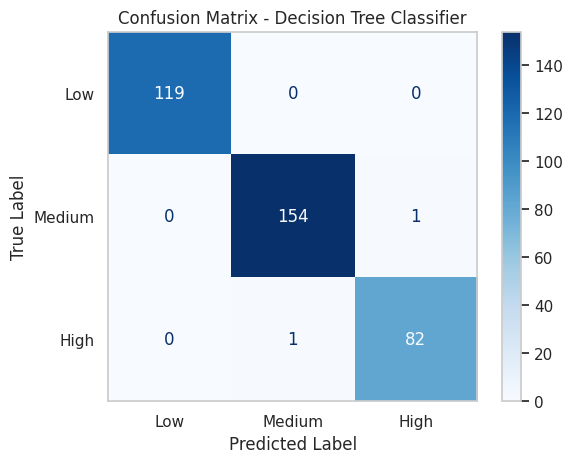

In [ ]:
# ----- Confusion Matrix -----
# Generate and display the confusion matrix
cm = confusion_matrix(y_test_labels, dt_preds_labels, labels=["Low", "Medium", "High"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

In [ ]:
# Creating a DataFrame to compare actual vs predicted Waste_Level labels for first 5 test samples
dt_comparison_df = pd.DataFrame({
    'Actual': le_cls.inverse_transform(y_test_cls[:5]),     # Decoding actual labels to original categories
    'Predicted': le_cls.inverse_transform(dt_preds[:5])     # Decoding predicted labels similarly
})

# Displaying the sample comparison to quickly check model predictions
print("Sample Classifications:\n", dt_comparison_df)


Sample Classifications:
    Actual Predicted
0  Medium    Medium
1  Medium    Medium
2  Medium    Medium
3  Medium    Medium
4     Low       Low


## Random Forest - Training & Predictions

In [ ]:
# Initializing the Random Forest Classifier
rf_cls_model = RandomForestClassifier()

# Training the model on the training classification data
rf_cls_model.fit(X_train_cls, y_train_cls)

# Predicting the Waste_Level classes on the test data
rf_cls_preds = rf_cls_model.predict(X_test_cls)


### Random Forest - Evaluation

In [ ]:
# Random Forest Classifier Evaluation
print("Random Forest Classifier Evaluation")

# Calculating and displaying accuracy
accuracy = accuracy_score(y_test_cls, rf_cls_preds)
print(f"Accuracy: {accuracy:.2f}")

# Decoding the labels back to original Waste_Level classes for clearer report
decoded_actual = le_cls.inverse_transform(y_test_cls)
decoded_predicted = le_cls.inverse_transform(rf_cls_preds)

# Printing the classification report with original class names
print("Classification Report:\n")
print(classification_report(
    decoded_actual,
    decoded_predicted,
    target_names=le_cls.classes_,
    zero_division=0  # Avoids warning if any class has no predicted samples
))


Random Forest Classifier Evaluation
Accuracy: 1.00
Classification Report:

              precision    recall  f1-score   support

        High       1.00      0.99      0.99        83
         Low       1.00      1.00      1.00       119
      Medium       0.99      1.00      1.00       155

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357



<Figure size 600x400 with 0 Axes>

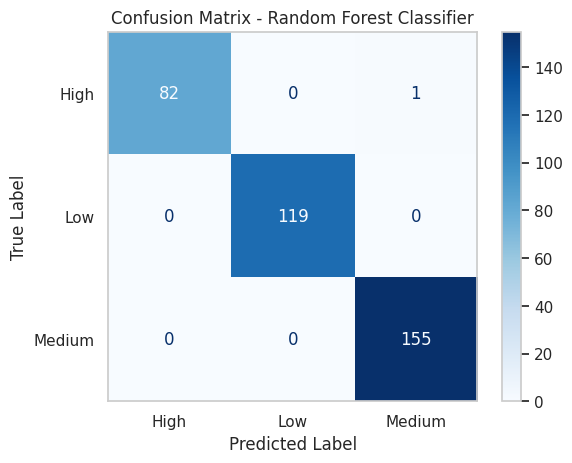

In [ ]:
# Create and display the confusion matrix
cm = confusion_matrix(decoded_actual, decoded_predicted, labels=le_cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_cls.classes_)

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

In [ ]:
# Sample Predictions
rf_cls_comparison_df = pd.DataFrame({
    'Actual': le_cls.inverse_transform(y_test_cls[:5]),
    'Predicted': le_cls.inverse_transform(rf_cls_preds[:5])
})
print("Sample Classifications:\n", rf_cls_comparison_df)


Sample Classifications:
    Actual Predicted
0  Medium    Medium
1  Medium    Medium
2  Medium    Medium
3  Medium    Medium
4     Low       Low


## XGBoost Classifier - Training & Predictions

In [ ]:
from xgboost import XGBClassifier

# Initializing the XGBoost Classifier
xgb_cls_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Training the model using the training classification dataset
xgb_cls_model.fit(X_train_cls, y_train_cls)

# Making predictions on the test set
xgb_cls_preds = xgb_cls_model.predict(X_test_cls)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:29:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Evaluating the XGBoost Classifier
print("XGBoost Evaluation")
print(f"Accuracy: {accuracy_score(y_test_cls, xgb_cls_preds):.2f}")

# Decoding labels back to original class names
decoded_actual = le_cls.inverse_transform(y_test_cls)
decoded_predicted = le_cls.inverse_transform(xgb_cls_preds)

# Printing the classification report
print("Classification Report:\n", classification_report(
    decoded_actual,
    decoded_predicted,
    target_names=le_cls.classes_
))

XGBoost Evaluation
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99        83
         Low       1.00      1.00      1.00       119
      Medium       0.99      0.99      0.99       155

    accuracy                           0.99       357
   macro avg       0.99      0.99      0.99       357
weighted avg       0.99      0.99      0.99       357



<Figure size 600x400 with 0 Axes>

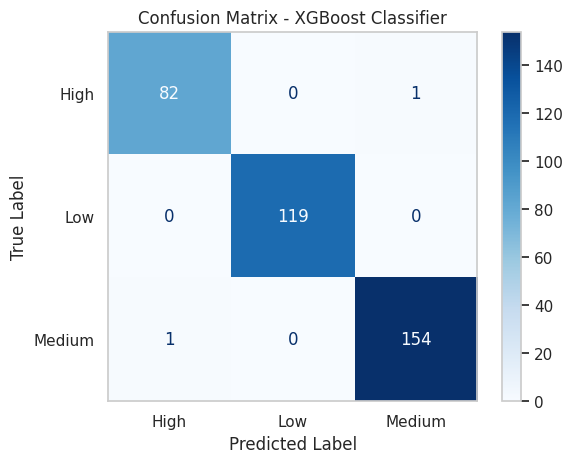

In [ ]:
# ----- Confusion Matrix -----
cm = confusion_matrix(decoded_actual, decoded_predicted, labels=le_cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_cls.classes_)

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()

In [ ]:
# Sample Predictions
xgb_cls_comparison_df = pd.DataFrame({
    'Actual': le_cls.inverse_transform(y_test_cls[:5]),
    'Predicted': le_cls.inverse_transform(xgb_cls_preds[:5])
})
print("Sample Classifications:\n", xgb_cls_comparison_df)


Sample Classifications:
    Actual Predicted
0  Medium    Medium
1  Medium    Medium
2  Medium    Medium
3  Medium    Medium
4     Low       Low


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-55-ab1808b2f9dc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=cls_comparison_df, ax=axes[0], palette="Blues_d")
<ipython-input-55-ab1808b2f9dc>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=cls_comparison_df, ax=axes[1], palette="Greens_d")
<ipython-input-55-ab1808b2f9dc>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

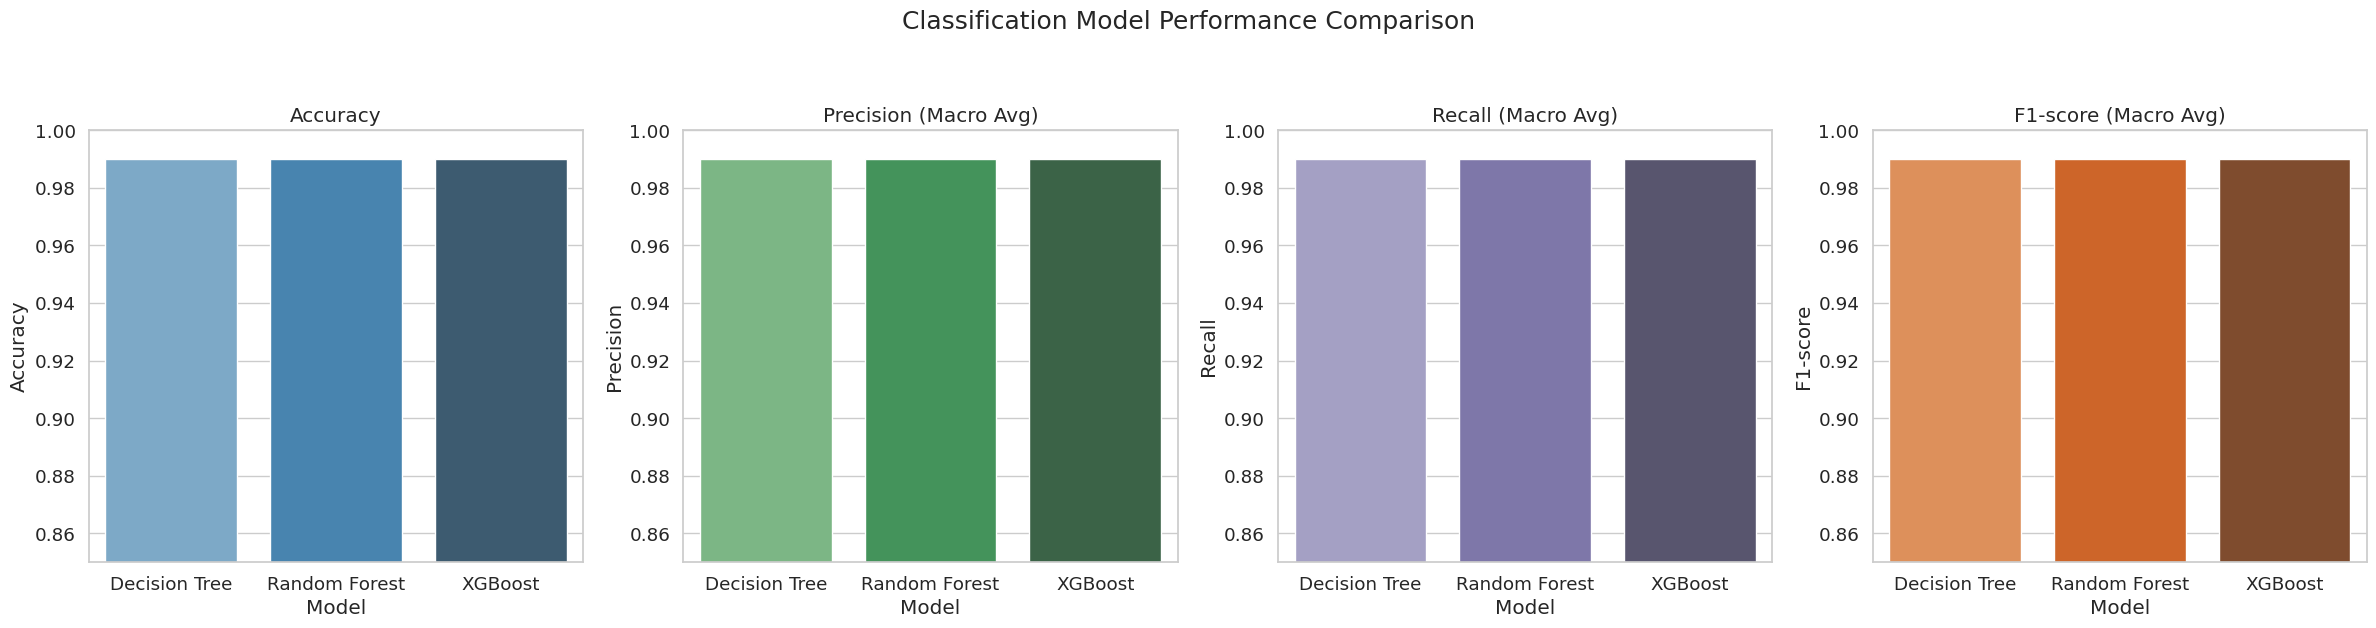

In [ ]:
# Setting seaborn style for better visuals
sns.set(style="whitegrid", font_scale=1.2)

# Dictionary of classification models
cls_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# List to store performance metrics for each model
metrics_list = []

# Loopping through models to train, predict, and store evaluation metrics
for name, model in cls_models.items():
    model.fit(X_train_cls, y_train_cls)
    preds = model.predict(X_test_cls)

    acc = accuracy_score(y_test_cls, preds)
    report = classification_report(
        le_cls.inverse_transform(y_test_cls),
        le_cls.inverse_transform(preds),
        target_names=le_cls.classes_,
        output_dict=True
    )

    metrics_list.append({
        'Model': name,
        'Accuracy': round(acc, 2),
        'Precision': round(report['macro avg']['precision'], 2),
        'Recall': round(report['macro avg']['recall'], 2),
        'F1-score': round(report['macro avg']['f1-score'], 2)
    })

# Converting metrics list into DataFrame
cls_comparison_df = pd.DataFrame(metrics_list)

# Setting larger figure size and better spacing
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Increased from (20, 5)

# Plotting Accuracy
sns.barplot(x='Model', y='Accuracy', data=cls_comparison_df, ax=axes[0], palette="Blues_d")
axes[0].set_title("Accuracy")
axes[0].set_ylim(0.85, 1)

# Plotting Precision
sns.barplot(x='Model', y='Precision', data=cls_comparison_df, ax=axes[1], palette="Greens_d")
axes[1].set_title("Precision (Macro Avg)")
axes[1].set_ylim(0.85, 1)

# Plotting Recall
sns.barplot(x='Model', y='Recall', data=cls_comparison_df, ax=axes[2], palette="Purples_d")
axes[2].set_title("Recall (Macro Avg)")
axes[2].set_ylim(0.85, 1)

# Plotting F1-score
sns.barplot(x='Model', y='F1-score', data=cls_comparison_df, ax=axes[3], palette="Oranges_d")
axes[3].set_title("F1-score (Macro Avg)")
axes[3].set_ylim(0.85, 1)

# Finalizing layout and display
plt.suptitle("Classification Model Performance Comparison", fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Defining filenames
model_filename = 'xgb_classification_model.pkl'
encoder_filename = 'waste_level_encoder.pkl' # Save the target encoder
feature_list_filename = 'classification_features.pkl' # Save feature names

# Saving the trained XGBoost Classifier model
joblib.dump(xgb_cls_model, model_filename)
print(f"Saved model to {model_filename}")

# Saving the LabelEncoder used for the target variable
joblib.dump(le_cls, encoder_filename)
print(f"Saved target encoder to {encoder_filename}")

# Saving the list of feature columns used for training
joblib.dump(X_train_cls.columns.tolist(), feature_list_filename)
print(f"Saved feature list to {feature_list_filename}")

joblib.dump(xgb_model, 'xgb_regression_model.pkl')
joblib.dump(X_train.columns.tolist(), 'regression_features.pkl')
print("Saved XGBoost regression model and feature list.")

joblib.dump(label_mappings, 'label_mappings.pkl')
print("Saved label mappings to label_mappings.pkl")

Saved model to xgb_classification_model.pkl
Saved target encoder to waste_level_encoder.pkl
Saved feature list to classification_features.pkl
Saved XGBoost regression model and feature list.
Saved label mappings to label_mappings.pkl


In [ ]:
# Loading saved models and artifacts
xgb_model_loaded = joblib.load('xgb_classification_model.pkl')
waste_level_encoder_loaded = joblib.load('waste_level_encoder.pkl')
feature_columns_loaded = joblib.load('classification_features.pkl')

xgb_reg_model = joblib.load('xgb_regression_model.pkl')
regression_features = joblib.load('regression_features.pkl')

# Sample label_mappings (this must be same as during training)
# Example: label_mappings = {'Event_Type': {'Wedding': 0, 'Corporate': 1, ...}, ...}
label_mappings = joblib.load('label_mappings.pkl')  # If you've saved it

# Defining the recommendation logic
def generate_recommendations(predicted_waste_level_str, input_data):
    recs = []
    if predicted_waste_level_str == 'High':
        recs.append("🔴 High waste predicted. Consider reducing quantity or optimizing serving strategy.")
    elif predicted_waste_level_str == 'Medium':
        recs.append("🟠 Moderate waste predicted. Monitor portions and guest preferences.")
    else:
        recs.append("🟢 Low waste predicted. Keep current practices.")

    guest_count = input_data.get('Number_of_Guests', 0)
    quantity = input_data.get('Quantity_of_Food', 0)
    if guest_count + 1 > 0:
        ratio = quantity / (guest_count + 1)
        if ratio > 2.5:
            recs.append("📉 Food-to-guest ratio is high. Reduce quantity or serve smaller portions.")
        elif ratio < 1.0:
            recs.append("⚠️ Food quantity may be too low. Consider increasing to avoid shortages.")
    else:
        recs.append("⚠️ Cannot calculate Guest-Food Ratio: Number of guests is zero.")

    prep_method = input_data.get('Preparation_Method')
    if prep_method == 'Buffet':
        if predicted_waste_level_str in ['High', 'Medium']:
            recs.append("🍽️ Buffets tend to generate more waste. Consider plated meals.")
        else:
            recs.append("✅ Buffet is working well.")
    elif prep_method == 'Sit-down Dinner':
        if predicted_waste_level_str == 'Low':
            recs.append("✅ Sit-down meals are helping control waste.")
        else:
            recs.append("🍽️ Sit-down meals may still waste food—review serving portions.")
    elif prep_method == 'Finger Food' and predicted_waste_level_str == 'High':
        recs.append("⚠️ Finger foods at high-waste events can lead to over-prep.")

    if input_data.get('Storage_Conditions') == 'Room Temperature':
        if predicted_waste_level_str in ['High', 'Medium']:
            recs.append("🧊 Room temperature may increase spoilage. Use refrigeration.")
    else:
        recs.append("✅ Cold storage helps minimize spoilage.")

    if input_data.get('Leftovers_Previous_Event') == 'Yes':
        if predicted_waste_level_str == 'High':
            recs.append("♻️ Leftovers + high predicted waste—reduce portions.")
        else:
            recs.append("♻️ Use past leftovers to refine future quantities.")

    if input_data.get('Purchase_History') == 'Occasional':
        if predicted_waste_level_str == 'High':
            recs.append("📝 Irregular purchasing may cause overbuying.")
    else:
        recs.append("📊 Regular purchase history improves forecasting.")

    season = input_data.get('Seasonality')
    if season in ['Summer', 'Peak']:
        recs.append("🌞 In peak season, track perishables closely.")
    else:
        recs.append("🍂 Cooler seasons may reduce spoilage.")

    food_type = input_data.get('Type_of_Food')
    if food_type in ['Meat', 'Dairy Products']:
        if predicted_waste_level_str in ['High', 'Medium']:
            recs.append("❄️ Perishables with medium/high waste—ensure strict control.")
        else:
            recs.append("✅ Proper handling of perishables is working.")
    elif food_type == 'Vegetables' and predicted_waste_level_str == 'High':
        recs.append("🥗 High vegetable waste—prep smaller batches.")

    event_type = input_data.get('Event_Type')
    if event_type in ['Wedding', 'Corporate'] and predicted_waste_level_str == 'High':
        recs.append("👥 Large events with high waste—revise portions.")

    pricing = input_data.get('Pricing')
    if pricing == 'High' and predicted_waste_level_str == 'High':
        recs.append("💸 High pricing with high waste—review expectations vs needs.")

    geo_location = input_data.get('Geographical_Location')
    if geo_location in ['Rural', 'Remote Area'] and predicted_waste_level_str == 'High':
        recs.append("🚚 Rural setting with high waste—improve logistics and storage.")

    return recs

# Getting user input (example input)
def get_user_input():
    return {
        'Number_of_Guests': 200,
        'Quantity_of_Food': 2000,
        'Type_of_Food': 'Meat',
        'Event_Type': 'Wedding',
        'Storage_Conditions': 'Room Temperature',
        'Purchase_History': 'Occasional',
        'Seasonality': 'Summer',
        'Preparation_Method': 'Buffet',
        'Geographical_Location': 'Rural',
        'Pricing': 'Low',
        'Leftovers_Previous_Event': 'Yes'
    }

# Unified classification + regression pipeline
def run_pipeline():
    input_data = get_user_input()

    # Addding derived feature
    input_data['Guest_Food_Ratio'] = input_data['Quantity_of_Food'] / (input_data['Number_of_Guests'] + 1)

    ### === CLASSIFICATION PIPELINE === ###
    input_df_cls = pd.DataFrame([input_data], columns=feature_columns_loaded)
    for col, mapping in label_mappings.items():
        if col in input_df_cls.columns:
            val = input_df_cls.at[0, col]
            if val not in mapping:
                print(f"❌ Unknown category '{val}' for feature '{col}'.")
                return
            input_df_cls[col] = mapping[val]

    predicted_encoded = xgb_model_loaded.predict(input_df_cls)[0]
    predicted_label = waste_level_encoder_loaded.inverse_transform([predicted_encoded])[0]

    ### === REGRESSION PIPELINE === ###
    input_df_reg = pd.DataFrame([input_data], columns=regression_features)
    for col, mapping in label_mappings.items():
        if col in input_df_reg.columns:
            val = input_df_reg.at[0, col]
            if val not in mapping:
                print(f"❌ Unknown category '{val}' for feature '{col}'.")
                return
            input_df_reg[col] = mapping[val]

    predicted_waste_amount = xgb_reg_model.predict(input_df_reg)[0].round(2)

    ### === OUTPUT === ###
    print("\n🎯 Predicted Waste Level:", predicted_label)
    print(f"📦 Estimated Wastage Amount: {predicted_waste_amount} kg")

    recommendations = generate_recommendations(predicted_label, input_data)
    print("\n💡 Recommendations:")
    for rec in recommendations:
        print("•", rec)

# Run if standalone
if __name__ == '__main__':
    if 'label_mappings' not in globals():
        print("❌ Error: 'label_mappings' not defined. Load or define before running.")
    else:
        run_pipeline()


🎯 Predicted Waste Level: High
📦 Estimated Wastage Amount: 29.34000015258789 kg

💡 Recommendations:
• 🔴 High waste predicted. Consider reducing quantity or optimizing serving strategy.
• 📉 Food-to-guest ratio is high. Reduce quantity or serve smaller portions.
• 🍽️ Buffets tend to generate more waste. Consider plated meals.
• 🧊 Room temperature may increase spoilage. Use refrigeration.
• ♻️ Leftovers + high predicted waste—reduce portions.
• 📝 Irregular purchasing may cause overbuying.
• 🌞 In peak season, track perishables closely.
• ❄️ Perishables with medium/high waste—ensure strict control.
• 👥 Large events with high waste—revise portions.
• 🚚 Rural setting with high waste—improve logistics and storage.


In [ ]:
!pip install -q gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import joblib
import pandas as pd

# Load models and encoders
xgb_model_loaded = joblib.load('xgb_classification_model.pkl')
waste_level_encoder_loaded = joblib.load('waste_level_encoder.pkl')
feature_columns_loaded = joblib.load('classification_features.pkl')
label_mappings = joblib.load('label_mappings.pkl')

xgb_reg_model = joblib.load('xgb_regression_model.pkl')
regression_features = joblib.load('regression_features.pkl')

def generate_recommendations(predicted_waste_level_str, input_data):
    recs = []

    # Base recommendation based on predicted level
    if predicted_waste_level_str == 'High':
        recs.append("🔴 High waste predicted. Consider reducing quantity or optimizing serving strategy.")
    elif predicted_waste_level_str == 'Medium':
        recs.append("🟠 Moderate waste predicted. Monitor portions and guest preferences.")
    else:
        recs.append("🟢 Low waste predicted. Keep current practices.")

    guest_count = input_data.get('Number_of_Guests', 0)
    quantity = input_data.get('Quantity_of_Food', 0)
    if guest_count + 1 > 0:
        ratio = quantity / (guest_count + 1)
        if ratio > 2.5:
            recs.append("📉 Food-to-guest ratio is high. Reduce quantity or serve smaller portions.")
        elif ratio < 1.0:
            recs.append("⚠️ Food quantity may be too low. Consider increasing to avoid shortages.")
    else:
        recs.append("⚠️ Cannot calculate Guest-Food Ratio: Number of guests is zero.")

    prep_method = input_data.get('Preparation_Method')
    if prep_method == 'Buffet':
        if predicted_waste_level_str in ['High', 'Medium']:
            recs.append("🍽️ Buffets tend to generate more waste, especially under current conditions. Consider plated or portion-controlled meals.")
        else:
            recs.append("✅ Buffet is working well. Continue with portion awareness.")
    elif prep_method == 'Sit-down Dinner':
        if predicted_waste_level_str == 'Low':
            recs.append("✅ Sit-down meals are helping control waste.")
        else:
            recs.append("🍽️ Sit-down meals may still waste food—review serving portions.")
    elif prep_method == 'Finger Food':
        if predicted_waste_level_str == 'High':
            recs.append("⚠️ Finger foods at high-waste events can lead to over-prep. Serve smaller platters.")

    storage_cond = input_data.get('Storage_Conditions')
    if storage_cond == 'Room Temperature':
        if predicted_waste_level_str in ['High', 'Medium']:
            recs.append("🧊 Room temperature storage may increase spoilage. Use refrigeration to reduce waste.")
        else:
            recs.append("⚠️ Room temp storage okay for now, but stay cautious with perishables.")
    elif storage_cond == 'Refrigerated':
        recs.append("✅ Cold storage helps minimize spoilage.")

    leftovers = input_data.get('Leftovers_Previous_Event')
    if leftovers == 'Yes':
        if predicted_waste_level_str == 'High':
            recs.append("♻️ Leftovers + high predicted waste—strongly consider reducing portions.")
        else:
            recs.append("♻️ Use past leftovers as a guide to refine future quantities.")

    purchase_hist = input_data.get('Purchase_History')
    if purchase_hist == 'Occasional':
        if predicted_waste_level_str == 'High':
            recs.append("📝 Irregular purchasing linked to overbuying. Standardize procurement processes.")
        else:
            recs.append("🧾 Monitor occasional purchases—log results for better planning.")
    elif purchase_hist == 'Regular':
        recs.append("📊 Regular purchase history helps improve forecasting accuracy.")

    season = input_data.get('Seasonality')
    if season in ['Summer', 'Peak']:
        recs.append("🌞 In peak season, track perishables and adjust guest count expectations.")
    elif season in ['Winter', 'All Seasons']:
        recs.append("🍂 Cooler seasons may reduce spoilage, but monitor portion control.")

    food_type = input_data.get('Type_of_Food')
    if food_type in ['Meat', 'Dairy Products']:
        if predicted_waste_level_str in ['High', 'Medium']:
            recs.append("❄️ Perishable items (meat/dairy) with medium/high waste—ensure strict temperature control.")
        else:
            recs.append("✅ Proper handling of perishables is working.")
    elif food_type == 'Vegetables':
        if predicted_waste_level_str == 'High':
            recs.append("🥗 High vegetable waste—prep smaller batches and serve fresh.")
        else:
            recs.append("✅ Good use of vegetables—keep freshness focus.")
    else:
        recs.append("✅ Food type has low spoilage risk.")

    event_type = input_data.get('Event_Type')
    if event_type in ['Wedding', 'Corporate']:
        if predicted_waste_level_str == 'High':
            recs.append("👥 Large events with high waste—track attendance and revise portions.")
        else:
            recs.append("📅 Event scale under control—continue monitoring.")
    else:
        recs.append("📅 Smaller events may allow better control of portions.")

    pricing = input_data.get('Pricing')
    if pricing == 'High':
        if predicted_waste_level_str == 'High':
            recs.append("💸 High pricing with high waste—review guest expectations vs actual needs.")
        else:
            recs.append("✅ High pricing balanced well with quantity.")
    elif pricing == 'Low':
        if predicted_waste_level_str == 'High':
            recs.append("⚠️ Even low-cost events are wasting—optimize portions urgently.")
        else:
            recs.append("💡 Low pricing helps control costs and waste.")
    elif pricing == 'Moderate':
        recs.append("⚖️ Mid-range pricing—review demand and satisfaction regularly.")

    geo_location = input_data.get('Geographical_Location')
    if geo_location in ['Rural', 'Remote Area']:
        if predicted_waste_level_str == 'High':
            recs.append("🚚 Rural setting with high waste—improve transport/storage plans.")
        else:
            recs.append("📦 Rural logistics managed well—maintain cold chains.")
    else:
        recs.append("✅ Urban logistics support efficient delivery and storage.")

    return recs


def predict_and_recommend(Number_of_Guests, Quantity_of_Food, Type_of_Food, Event_Type,
                          Storage_Conditions, Purchase_History, Seasonality, Preparation_Method,
                          Geographical_Location, Pricing, Leftovers_Previous_Event):

    input_data = {
        'Number_of_Guests': Number_of_Guests,
        'Quantity_of_Food': Quantity_of_Food,
        'Type_of_Food': Type_of_Food,
        'Event_Type': Event_Type,
        'Storage_Conditions': Storage_Conditions,
        'Purchase_History': Purchase_History,
        'Seasonality': Seasonality,
        'Preparation_Method': Preparation_Method,
        'Geographical_Location': Geographical_Location,
        'Pricing': Pricing,
        'Leftovers_Previous_Event': Leftovers_Previous_Event
    }

    input_df = pd.DataFrame([input_data], columns=feature_columns_loaded)

    # Map categorical inputs using label mappings, check for invalids
    for col, mapping in label_mappings.items():
        if col in input_df.columns:
            mapped = input_df[col].map(mapping)
            if mapped.isnull().any():
                return f"Invalid input for {col}. Please select a valid option.", ""
            input_df[col] = mapped

    pred_encoded = xgb_model_loaded.predict(input_df)[0]
    pred_str = waste_level_encoder_loaded.inverse_transform([pred_encoded])[0]

    recommendations = generate_recommendations(pred_str, input_data)
    return f"🎯 Waste Level: {pred_str}", "\n".join(recommendations)


iface = gr.Interface(
    fn=predict_and_recommend,
    inputs=[
        gr.Number(label="Number of Guests"),
        gr.Number(label="Quantity of Food"),
        gr.Dropdown(["Baked Goods", "Dairy Products", "Fruits", "Meat", "Vegetables"], label="Type of Food"),
        gr.Dropdown(["Birthday", "Corporate", "Social Gathering", "Wedding"], label="Event Type"),
        gr.Dropdown(["Room Temperature", "Refrigerated"], label="Storage Conditions"),
        gr.Dropdown(["Regular", "Occasional"], label="Purchase History"),
        gr.Dropdown(["All Seasons", "Summer", "Winter", "Peak"], label="Seasonality"),
        gr.Dropdown(["Buffet", "Sit-down Dinner", "Finger Food"], label="Preparation Method"),
        gr.Dropdown(["Rural", "Suburban", "Urban", "Remote Area"], label="Geographical Location"),
        gr.Dropdown(["High", "Low", "Moderate"], label="Pricing"),
        gr.Dropdown(["Yes", "No"], label="Leftovers from Previous Event")
    ],
    outputs=[
        gr.Text(label="Prediction"),
        gr.Textbox(label="Recommendations", lines=10)
    ],
    title="🍽️ FoodWasteSensor: Sensing Waste, Serving Sustainability.",
    description="Enter event details to predict food waste level and get suggestions."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5742ab2e7e4db12026.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
